In [67]:
from typing import Dict,TypedDict,List
from langgraph.graph import StateGraph,END,START
from IPython.display import Image, display

In [68]:
class TravelState(TypedDict):
    destination: str
    budget: int
    distance: int
    decision: str

In [69]:
def check_budget(state: TravelState):
    """Check if budget is sufficient"""
    print("--- Node: Checking Budget ---")
    if state["budget"] < 500:
        return {"decision": "less budget"} # Pre-setting the decision
    return {"budget": state["budget"]}

def calculate_distance(state: TravelState)->dict:
    print("--- Node: Calculating Distance ---")
    print(state)
    # If destination is Paris, distance is 1500 km, else 700 km
    dist = 1500 if state["destination"] == "Paris" else 700
    return {"distance": dist}

def luxury_plane(state: TravelState)->dict:
    """If budget > 1000 and distance > 1000, fly first class"""
    print("--- Node: Booking Flight ---")
    print(state)
    return {"decision": "Flying in First Class!"}

def economy_bus(state: TravelState)->dict:
    """Otherwise, take the scenic bus route"""
    print("--- Node: Booking Bus ---")
    print(state)
    return {"decision": "Taking the scenic bus route."}

# 3. Router Functions (The "Logic" for the Edges)
def router_budget(state: TravelState)->dict:
    """ If budget < 500, too less budget to travel """
    print(state)
    if state["budget"] < 500:
        return "too less budget"
    return "affordable"

def router_distance(state: TravelState)->dict:
    """ If distance > 1000, far destination """
    print(state)
    if state["distance"] > 1000:
        return "far"
    return "near"

In [70]:
graph = StateGraph(TravelState)
graph.add_node("check_budget",check_budget)
graph.add_node("calculate_distance",calculate_distance)
graph.add_node("luxury_plane",luxury_plane)
graph.add_node("economy_bus",economy_bus)

In [71]:
graph.set_entry_point("check_budget")

graph.add_conditional_edges(
    "check_budget", # the incoming node to conditional logic
    router_budget, #the conditional function
    {
        # return value from router function : next node
        "too less budget": END,
        "affordable": "calculate_distance"
    }
)

graph.add_conditional_edges(
    "calculate_distance",
    router_distance,
    {
        # return value from router function : next node
        "far": "luxury_plane",
        "near": "economy_bus"
    }
)

graph.add_edge("luxury_plane", END)
graph.add_edge("economy_bus", END)
graph.add_edge("check_budget", END)  # Edge for less budget case

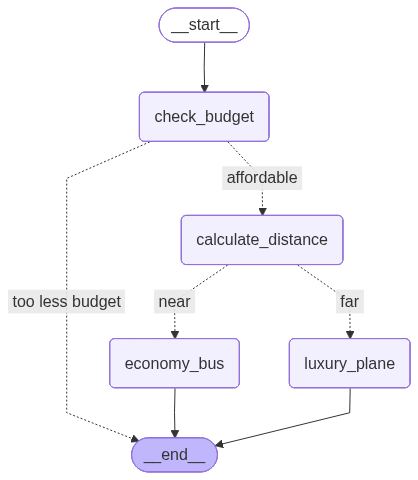

In [72]:
app=graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [73]:
result = app.invoke({"destination": "Paris", "budget": 1200})
print("-----------RESULT---------")
print(result)
print("-----------END------------")
print(f"\nFinal Plan for {result['destination']}: {result['decision']}")

--- Node: Checking Budget ---
{'destination': 'Paris', 'budget': 1200}
--- Node: Calculating Distance ---
{'destination': 'Paris', 'budget': 1200}
{'destination': 'Paris', 'budget': 1200, 'distance': 1500}
--- Node: Booking Flight ---
{'destination': 'Paris', 'budget': 1200, 'distance': 1500}
-----------RESULT---------
{'destination': 'Paris', 'budget': 1200, 'distance': 1500, 'decision': 'Flying in First Class!'}
-----------END------------

Final Plan for Paris: Flying in First Class!


In [74]:
result = app.invoke({"destination": "Vietnam", "budget":200})
print("-----------RESULT---------")
print(result)
print("-----------END------------")

--- Node: Checking Budget ---
{'destination': 'Vietnam', 'budget': 200, 'decision': 'less budget'}
-----------RESULT---------
{'destination': 'Vietnam', 'budget': 200, 'decision': 'less budget'}
-----------END------------


In [77]:
result = app.invoke({"destination": "Vietnam", "budget":90000})
print("-----------RESULT---------")
print(result)
print("-----------END------------")

--- Node: Checking Budget ---
{'destination': 'Vietnam', 'budget': 90000}
--- Node: Calculating Distance ---
{'destination': 'Vietnam', 'budget': 90000}
{'destination': 'Vietnam', 'budget': 90000, 'distance': 700}
--- Node: Booking Bus ---
{'destination': 'Vietnam', 'budget': 90000, 'distance': 700}
-----------RESULT---------
{'destination': 'Vietnam', 'budget': 90000, 'distance': 700, 'decision': 'Taking the scenic bus route.'}
-----------END------------
